In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from tqdm import tqdm
import random

# Load digits dataset from sklearn
digit_dataset = datasets.load_digits()
features = digit_dataset.data
labels = digit_dataset.target

# To store final output and convergence info
final_results = []
iteration_tracking = {}

# Parameter space to sample from
kernel_options = ['linear', 'poly', 'rbf', 'sigmoid']
C_range = np.logspace(-1, 2, 10)  # Values between 0.1 and 100
gamma_choices = ['scale', 'auto']

# Perform 10 randomized train-test splits
for split_num in range(1, 11):
    print(f"\nRunning for Dataset Split S{split_num}...")
    
    X_train, X_test, y_train, y_test = train_test_split(
        features, labels, test_size=0.3, stratify=labels, random_state=split_num
    )

    highest_acc = 0
    optimal_config = {}
    accuracy_log = []

    # Try 100 random hyperparameter combinations
    for itr in tqdm(range(100), desc=f"Searching Parameters for Split S{split_num}"):
        selected_kernel = random.choice(kernel_options)
        selected_C = random.choice(C_range)
        selected_gamma = random.choice(gamma_choices)

        # Set up the pipeline with scaling and SVC
        pipeline = make_pipeline(
            StandardScaler(),
            SVC(kernel=selected_kernel, C=selected_C, gamma=selected_gamma)
        )

        # Fit model and make predictions
        pipeline.fit(X_train, y_train)
        predictions = pipeline.predict(X_test)
        current_acc = accuracy_score(y_test, predictions)
        accuracy_log.append(current_acc)

        # Update best if current is better
        if current_acc > highest_acc:
            highest_acc = current_acc
            optimal_config = {
                'Kernel': selected_kernel,
                'C': selected_C,
                'Gamma': selected_gamma
            }

    # Log the best results for current split
    final_results.append({
        'Split': f"S{split_num}",
        'Top Accuracy': highest_acc,
        'Optimal Parameters': optimal_config
    })

    iteration_tracking[f"S{split_num}"] = accuracy_log

# Convert results into a DataFrame
results_dataframe = pd.DataFrame(final_results)



Processing Sample S1...


Optimizing SVM for Sample S1: 100%|██████████| 100/100 [00:08<00:00, 12.09it/s]



Processing Sample S2...


Optimizing SVM for Sample S2: 100%|██████████| 100/100 [00:07<00:00, 13.10it/s]



Processing Sample S3...


Optimizing SVM for Sample S3: 100%|██████████| 100/100 [00:07<00:00, 12.62it/s]



Processing Sample S4...


Optimizing SVM for Sample S4: 100%|██████████| 100/100 [00:07<00:00, 13.82it/s]



Processing Sample S5...


Optimizing SVM for Sample S5: 100%|██████████| 100/100 [00:08<00:00, 11.68it/s]



Processing Sample S6...


Optimizing SVM for Sample S6: 100%|██████████| 100/100 [00:07<00:00, 13.12it/s]



Processing Sample S7...


Optimizing SVM for Sample S7: 100%|██████████| 100/100 [00:08<00:00, 11.36it/s]



Processing Sample S8...


Optimizing SVM for Sample S8: 100%|██████████| 100/100 [00:07<00:00, 13.15it/s]



Processing Sample S9...


Optimizing SVM for Sample S9: 100%|██████████| 100/100 [00:07<00:00, 12.77it/s]



Processing Sample S10...


Optimizing SVM for Sample S10: 100%|██████████| 100/100 [00:07<00:00, 13.11it/s]



Final Results (Pretty Table):
+------------+-----------------+---------------------------------------------------+
| Sample #   |   Best Accuracy | Best SVM Parameters                               |
+============+=================+===================================================+
| S1         |        0.987037 | Kernel=rbf, C=1.0, Gamma=auto                     |
+------------+-----------------+---------------------------------------------------+
| S2         |        0.97963  | Kernel=linear, C=0.21544346900318834, Gamma=scale |
+------------+-----------------+---------------------------------------------------+
| S3         |        0.988889 | Kernel=poly, C=21.54434690031882, Gamma=scale     |
+------------+-----------------+---------------------------------------------------+
| S4         |        0.992593 | Kernel=poly, C=21.54434690031882, Gamma=scale     |
+------------+-----------------+---------------------------------------------------+
| S5         |        0.985185 | K

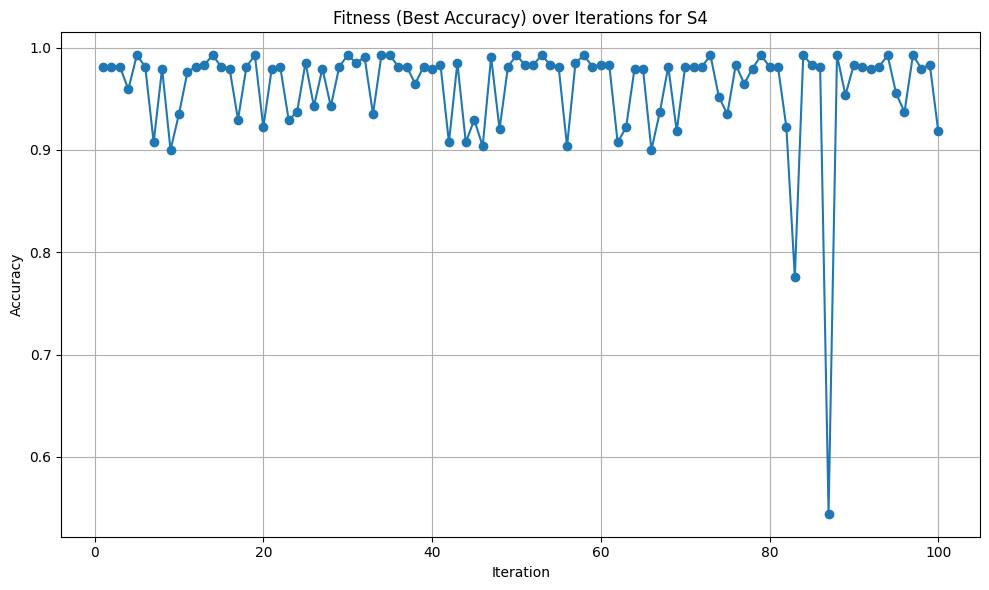

In [ ]:
from tabulate import tabulate

# Helper function to turn parameter dictionary into a string
def stringify_params(params):
    if isinstance(params, dict):
        return ', '.join(f'{key}={val}' for key, val in params.items())
    return params

# Apply formatting to the optimal parameter sets
results_dataframe['Optimal Parameters'] = results_dataframe['Optimal Parameters'].apply(stringify_params)

# Display the final output table using tabulate
print("\nSummary of Results (Formatted Table):")
print(tabulate(results_dataframe, headers='keys', tablefmt='grid', showindex=False))

# Find the dataset split with the top-performing accuracy
top_split = results_dataframe.loc[results_dataframe['Top Accuracy'].idxmax()]['Split']
print(f"\nDataset Split with Best Accuracy: {top_split}")

# Plot how accuracy evolved over iterations for the best-performing split
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), iteration_tracking[top_split], marker='o')
plt.title(f"Accuracy Progression Across Iterations for {top_split}")
plt.xlabel("Iteration Number")
plt.ylabel("Accuracy Score")
plt.grid(True)
plt.tight_layout()
plt.show()
